# 5 Plotting
In this notebook we plot the RMSE versus Time (weeks) plot, for both using features and using cell counts as input to the regressors. This notebook is created retroactively based on `plot_script.py` in Milestone3, and adapted to use data directly in `PackedProject`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
import math

In [2]:
classifiers = ['tree', 'svr', 'gaussian_process', 'lasso']
models = ['dossantos', 'gonzalez', 'moonchai', 'precharattana', 'rana']
modelsnames = {m : m.capitalize() for m in models[1:]}
modelsnames['dossantos'] = 'Dos Santos'
names = {
    'tree': 'Tree',
    'svr': 'Support Vector Machine',
    'gaussian_process': 'Gaussian Process',
    'lasso': 'Lasso'
}

## Plots for Regular Simulation (Milestone 2)
In the cells below we generate the plots for "regular simulation" runs, i.e. those done in Milestone 2, where the parameters are kept to default values. We will plot both scores by image features and by cell counts against Time (weeks) for each model.

In [3]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, os.pardir, os.pardir, 'Results')
SAVE_DIR = os.path.join(BASE_DIR, os.pardir, os.pardir, 'Report', 'Figures', 'CrossFoldValScore')

In [4]:
def plot_cell_counts(dir):
    fig = plt.figure(figsize=(11,7))
    fig.suptitle(names[dir] + ' (Cell Counts)', fontsize=16)
    for i in range(5):
        ax = fig.add_subplot(3,2,i+1)
        ax.set_title(str(models[i].capitalize()))
        ax.set_xlabel('T_bound')
        ax.set_ylabel('Avg RMSE')
        data_path= dir + '/' + models[i] + '_cell_counts.csv'
        data=pd.read_csv(data_path)
        health = data[0:41]
        dead = data[41:82]
        A1=data[82:123]
        A2=data[123:]
        ax.errorbar(health["T_bound"], health['score_avg'], health['score_stdev'], 
                 marker='.', markerfacecolor='green', markeredgecolor='green',
                 linestyle='None', ecolor='green', markersize=4, elinewidth=0.3,
                 capthick=0.35, capsize=1.25)
        ax.errorbar(dead["T_bound"], dead['score_avg'], dead['score_stdev'], 
                  marker='.', markerfacecolor='black', markeredgecolor='black',
                  linestyle='None', ecolor='black', markersize=4, elinewidth=0.3,
                  capthick=0.35, capsize=1.25)
        ax.errorbar(health["T_bound"], A1['score_avg'], A1['score_stdev'], 
                  marker='.', markerfacecolor='red', markeredgecolor='red',
                  linestyle='None', ecolor='red', markersize=4, elinewidth=0.3,
                  capthick=0.35, capsize=1.25)
        ax.errorbar(health["T_bound"], A2['score_avg'], A2['score_stdev'], 
                  marker='.', markerfacecolor='blue', markeredgecolor='blue',
                  linestyle='None', ecolor='blue', markersize=4, elinewidth=0.3,
                  capthick=0.35, capsize=1.25)
    legend_elements = [Patch(facecolor='green', edgecolor='green', label='Healthy'), 
                Patch(facecolor='black', edgecolor='black', label='Dead'),
                Patch(facecolor='red', edgecolor='red', label='Acute Infected (A1)'),
                Patch(facecolor='blue', edgecolor='blue', label='Latent Infected (A2)')]
    fig.legend(handles=legend_elements, loc='lower right')
    fig.tight_layout(pad=3.0)
    return fig, ax

In [5]:
def crawl_and_plot(DATA_DIR, SAVE_DIR):
    """
    Given a directory, crawl through the subdirectories and plot all data 
    where applicable. We expect the directory to have the the following
    structure:
    
    CrossFoldScores_CellCounts
    ├- gaussian_process (which contains some model_cell_counts.csv files)
    ├- lasso (same as above)
    ├- svr
    └- tree
    CrossFoldScores_Features
    ├- gaussian_process (which contains some model.csv files)
    ├- lasso (same as above)
    ├- svr
    └- tree
    
    The plots will be saved in the corresponding place in the mirroring
    directory structure of SAVE_DIR.
    """
    
    os.chdir(DATA_DIR)
    
    # First process the data in CrossFoldScores_CellCounts
    os.chdir('CrossFoldScores_CellCounts')
    BACK_DIR = os.getcwd()
    for d in ['gaussian_process', 'lasso', 'svr', 'tree']:
        os.chdir(d)
        
        numFiles = len([f for f in os.listdir() if f[0] != '.'])
        numRows = numFiles // 2 + 1
        fig, axs = plt.subplots(nrows=numRows, ncols=2, figsize=(11, 2.5 * numRows))
        fig.suptitle(f'{names[d]} (Cell Counts)')
        
        # Check if we need to remove an axis
        axs = axs.flat
        if numFiles % 2 == 1:
            fig.delaxes(axs[-1])
        else:
            fig.delaxes(axs[-1])
            fig.delaxes(axs[-2])
        
        # Check what models are under the directory (The early treatment directories
        # will only have rana and gonzalez, for example)
        allModels = [f[:f.find('_')] for f in os.listdir() if f[0] != '.']
        for model, ax in zip(allModels, axs):
            ax.set_title(modelsnames[model])
            ax.set_xlabel('Time (weeks)')
            ax.set_ylabel('Avg RMSE')
#             ax.set_yscale('log')
#             ax.set_ylim([10**-5, 10**1])
            
            data = pd.read_csv(f'{model}_cell_counts.csv')
            health = data[0:41]
            dead = data[41:82]
            A1 = data[82:123]
            A2 = data[123:]
            
            ax.errorbar(health["T_bound"], health['score_avg'], health['score_stdev'], 
                     marker='.', markerfacecolor='green', markeredgecolor='green',
                     linestyle='None', ecolor='green', markersize=4, elinewidth=0.3,
                     capthick=0.35, capsize=1.25)
            ax.errorbar(dead["T_bound"], dead['score_avg'], dead['score_stdev'], 
                      marker='.', markerfacecolor='black', markeredgecolor='black',
                      linestyle='None', ecolor='black', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
            ax.errorbar(health["T_bound"], A1['score_avg'], A1['score_stdev'], 
                      marker='.', markerfacecolor='red', markeredgecolor='red',
                      linestyle='None', ecolor='red', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
            ax.errorbar(health["T_bound"], A2['score_avg'], A2['score_stdev'], 
                      marker='.', markerfacecolor='blue', markeredgecolor='blue',
                      linestyle='None', ecolor='blue', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
        
        fig.tight_layout(pad=3.0)
        legend_elements = [Patch(facecolor='green', edgecolor='green', label='Healthy'), 
                Patch(facecolor='black', edgecolor='black', label='Dead'),
                Patch(facecolor='red', edgecolor='red', label='Acute Infected (A1)'),
                Patch(facecolor='blue', edgecolor='blue', label='Latent Infected (A2)')]
        
        # Figure out where to place legends
        fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(.8, .1))
        
        # Save results
        EXPORT_DIR = os.path.join(SAVE_DIR, 'CrossFoldScores_CellCounts')
        if not os.path.isdir(EXPORT_DIR):
            os.makedirs(EXPORT_DIR)
        os.chdir(EXPORT_DIR)
        plt.savefig(f'{d}_plot.png')
        
        os.chdir(BACK_DIR)
    os.chdir(os.pardir)
    
    # Next process the data in CrossFoldScores_Features
    os.chdir('CrossFoldScores_Features')
    BACK_DIR = os.getcwd()
    for d in ['gaussian_process', 'lasso', 'svr', 'tree']:
        os.chdir(d)
        
        numFiles = len([f for f in os.listdir() if f[0] != '.'])
        numRows = numFiles // 2 + 1
        fig, axs = plt.subplots(nrows=numRows, ncols=2, figsize=(11, 2.5 * numRows))
        fig.suptitle(f'{names[d]} (Image Features)')
        
        # Check if we need to remove an axis
        axs = axs.flat
        if numFiles % 2 == 1:
            fig.delaxes(axs[-1])
        else:
            fig.delaxes(axs[-1])
            fig.delaxes(axs[-2])
        
        # Check what models are under the directory (The early treatment directories
        # will only have rana and gonzalez, for example)
        allModels = [f[:f.find('.')] for f in os.listdir() if f[0] != '.']
        for model, ax in zip(allModels, axs):
            ax.set_title(modelsnames[model])
            ax.set_xlabel('Time (weeks)')
            ax.set_ylabel('Avg RMSE')
#             ax.set_yscale('log')
#             ax.set_ylim([10**-5, 10**1])
            
            data = pd.read_csv(f'{model}.csv')
            health = data[0:41]
            dead = data[41:82]
            A1 = data[82:123]
            A2 = data[123:]
            
            ax.errorbar(health["T_bound"], health['score_avg'], health['score_stdev'], 
                     marker='.', markerfacecolor='green', markeredgecolor='green',
                     linestyle='None', ecolor='green', markersize=4, elinewidth=0.3,
                     capthick=0.35, capsize=1.25)
            ax.errorbar(dead["T_bound"], dead['score_avg'], dead['score_stdev'], 
                      marker='.', markerfacecolor='black', markeredgecolor='black',
                      linestyle='None', ecolor='black', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
            ax.errorbar(health["T_bound"], A1['score_avg'], A1['score_stdev'], 
                      marker='.', markerfacecolor='red', markeredgecolor='red',
                      linestyle='None', ecolor='red', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
            ax.errorbar(health["T_bound"], A2['score_avg'], A2['score_stdev'], 
                      marker='.', markerfacecolor='blue', markeredgecolor='blue',
                      linestyle='None', ecolor='blue', markersize=4, elinewidth=0.3,
                      capthick=0.35, capsize=1.25)
        
        fig.tight_layout(pad=3.0)
        legend_elements = [Patch(facecolor='green', edgecolor='green', label='Healthy'), 
                Patch(facecolor='black', edgecolor='black', label='Dead'),
                Patch(facecolor='red', edgecolor='red', label='Acute Infected (A1)'),
                Patch(facecolor='blue', edgecolor='blue', label='Latent Infected (A2)')]
        
        # Figure out where to place legends
        fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(.8, .1))
        
        # Save results
        EXPORT_DIR = os.path.join(SAVE_DIR, 'CrossFoldScores_Features')
        if not os.path.isdir(EXPORT_DIR):
            os.makedirs(EXPORT_DIR)
        os.chdir(EXPORT_DIR)
        plt.savefig(f'{d}_plot.png')
        
        os.chdir(BACK_DIR)
    
    os.chdir(os.pardir)

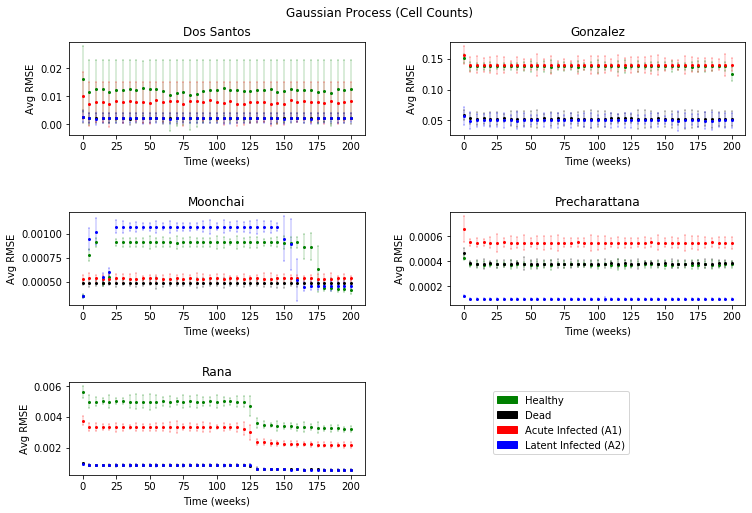

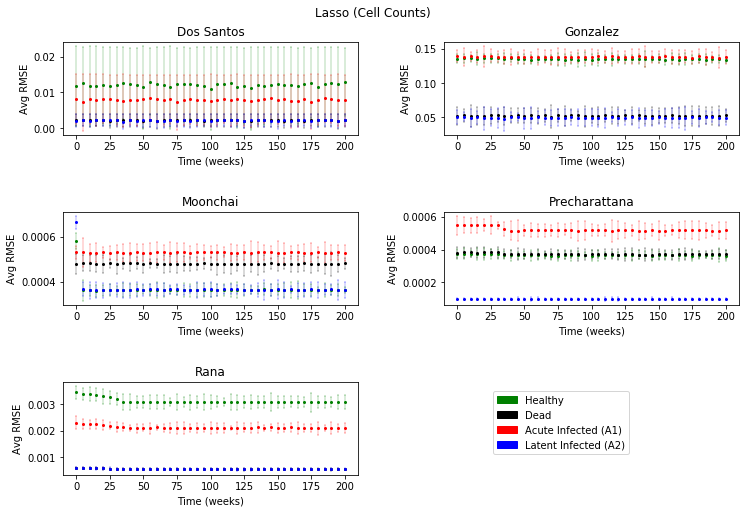

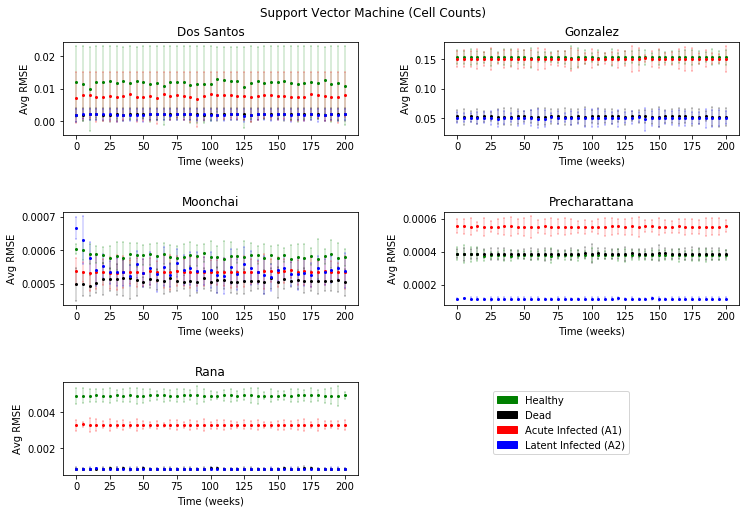

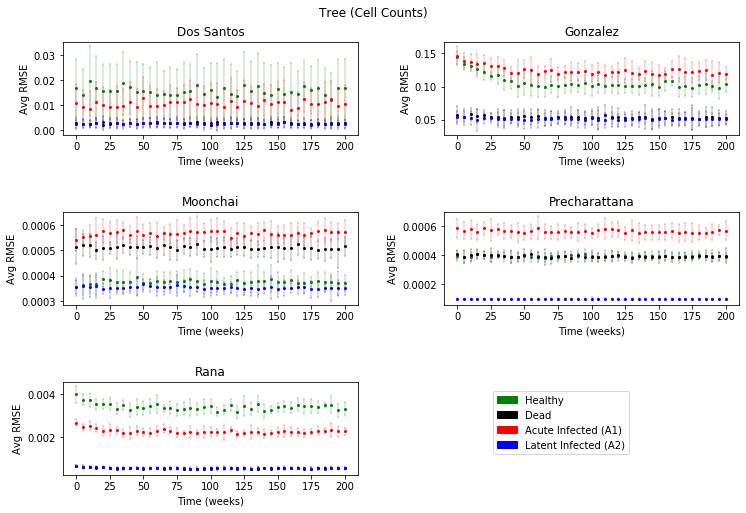

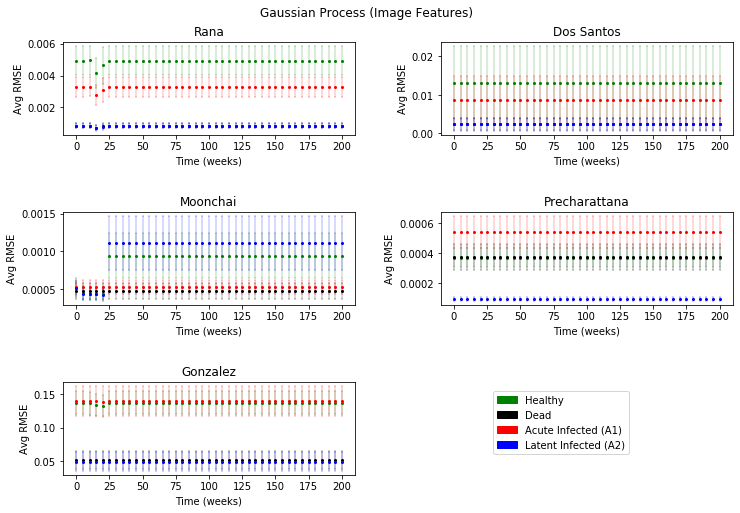

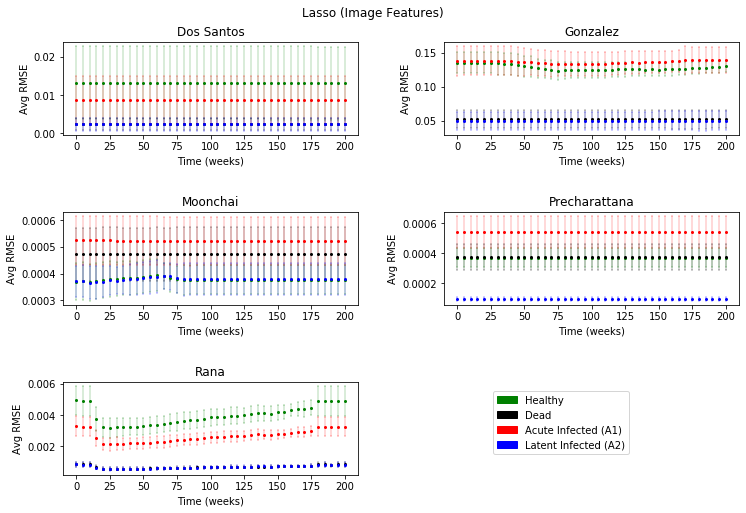

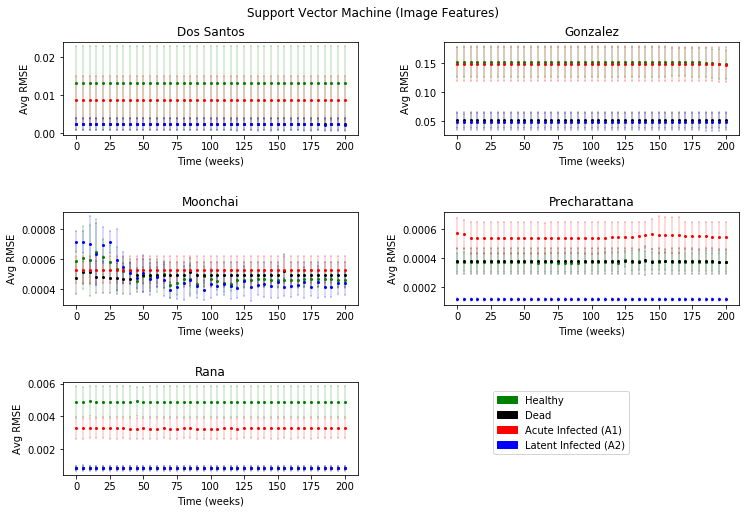

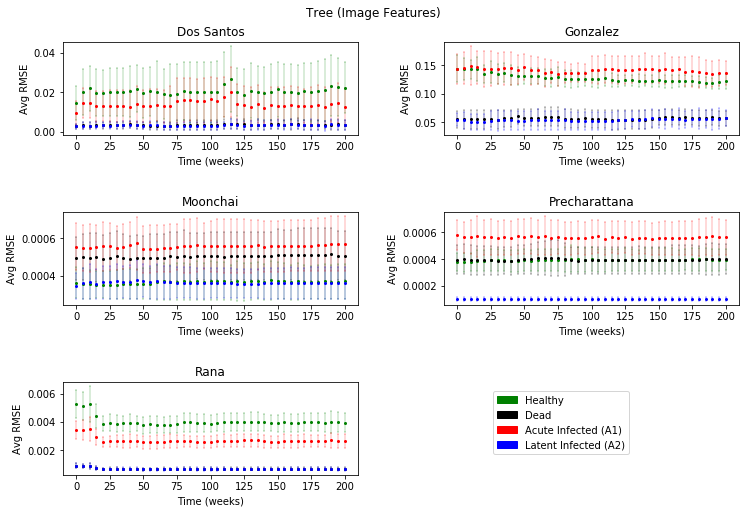

In [6]:
crawl_and_plot(DATA_DIR, SAVE_DIR);

## Plots for Early Treatment Simulations (Milestone 2)
In the cells below we generate the plots for "early treatment simulation" runs. We will plot both scores by image features and by cell counts against Time (weeks) for each model.

The error message below is due to the fact we do not have data for the image feature data fully extracted for the simulations where treatment starts at week 8.

FileNotFoundError: [Errno 2] No such file or directory: 'gaussian_process'

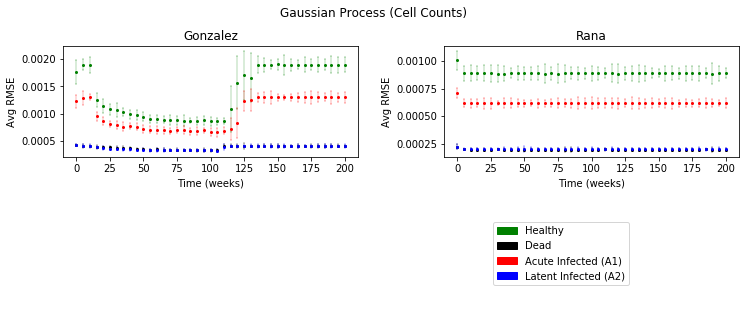

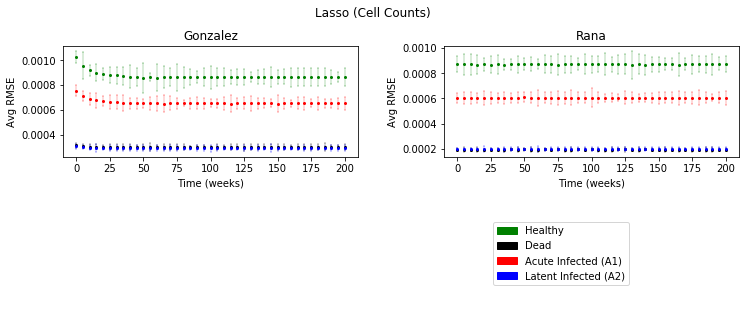

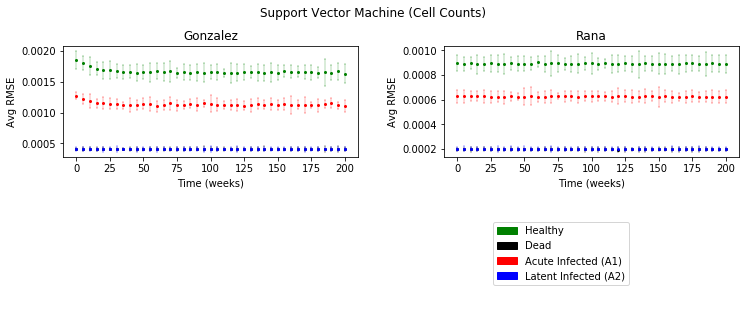

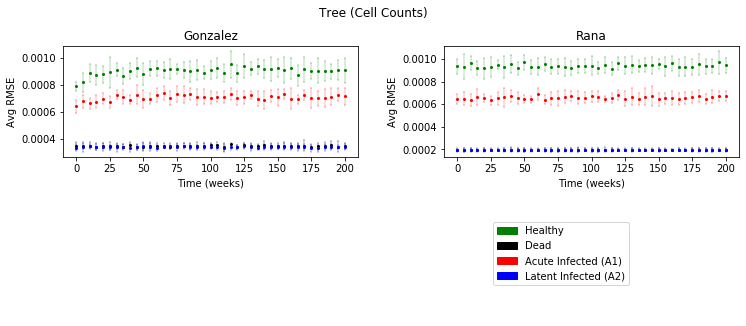

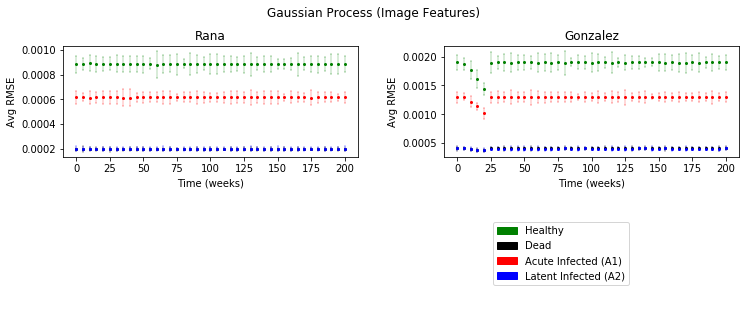

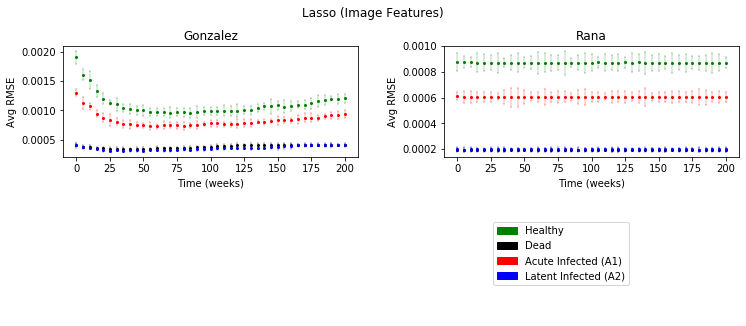

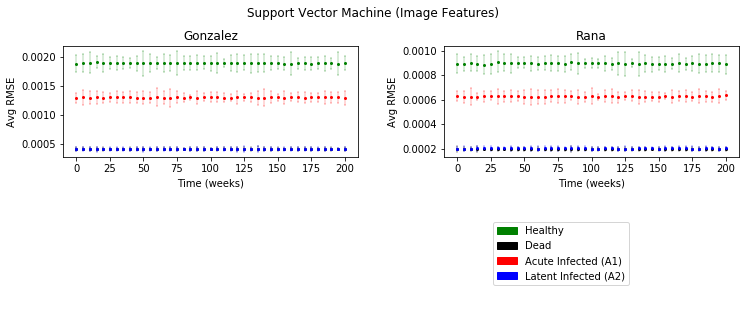

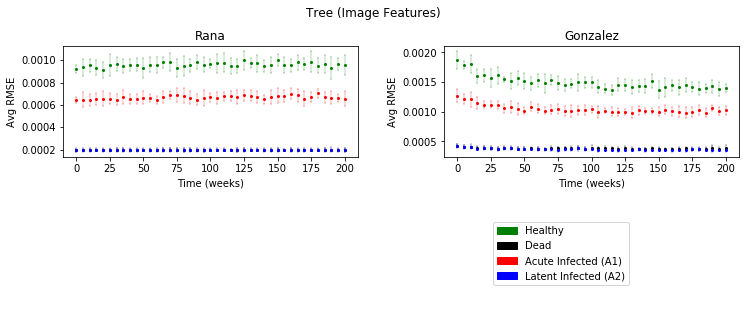

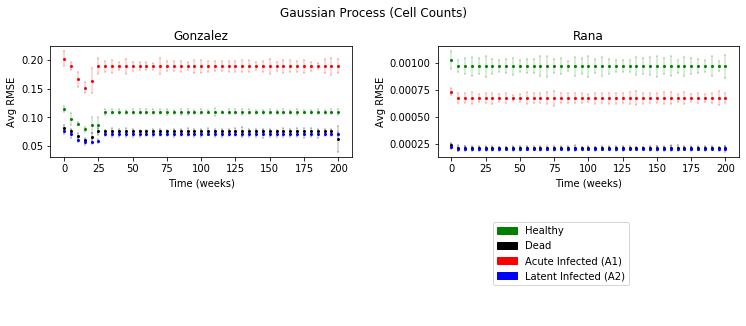

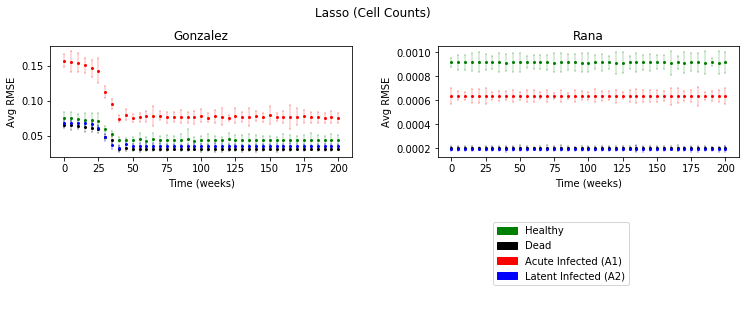

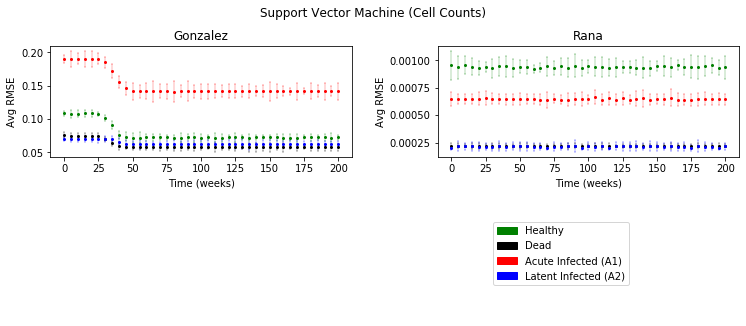

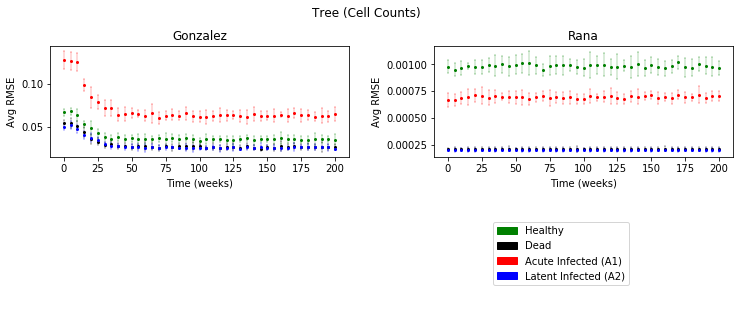

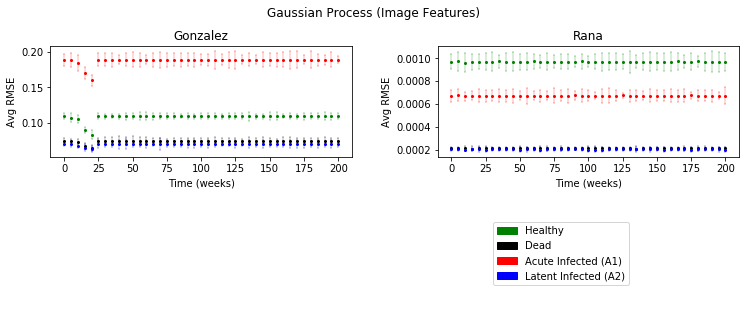

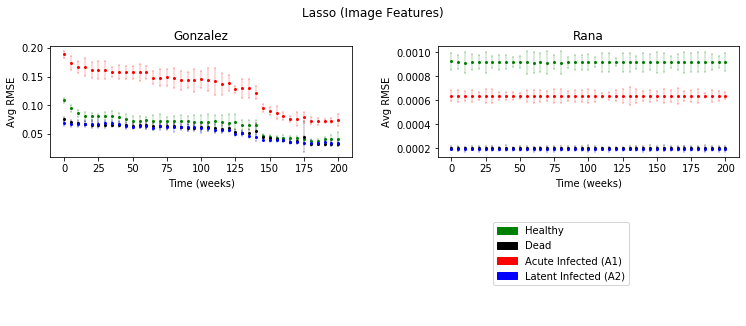

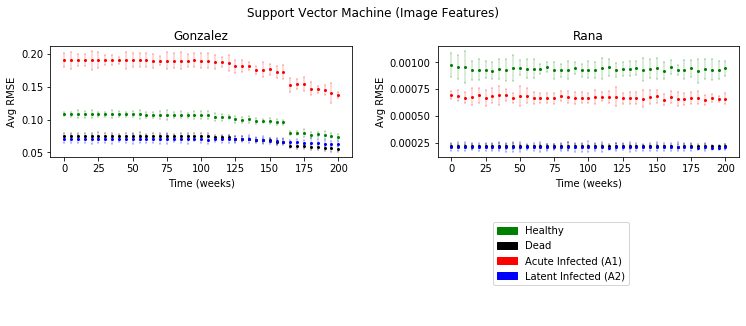

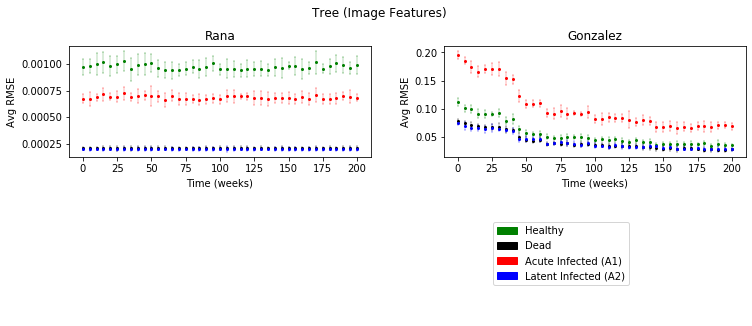

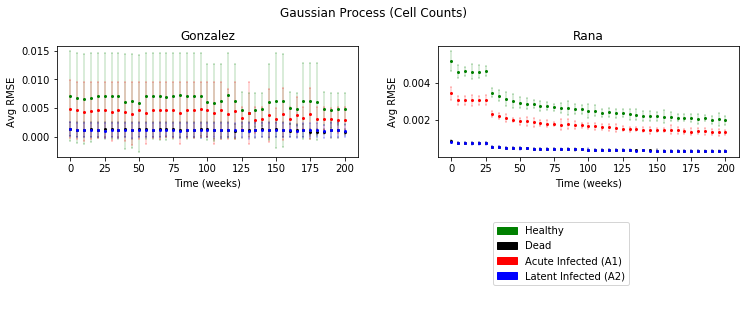

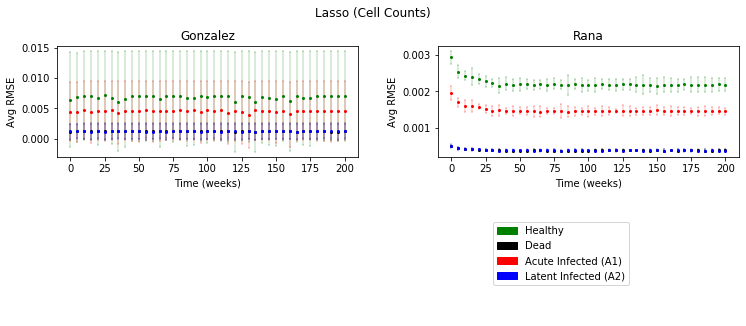

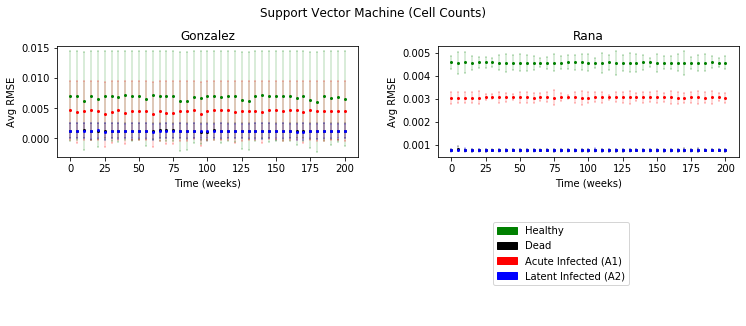

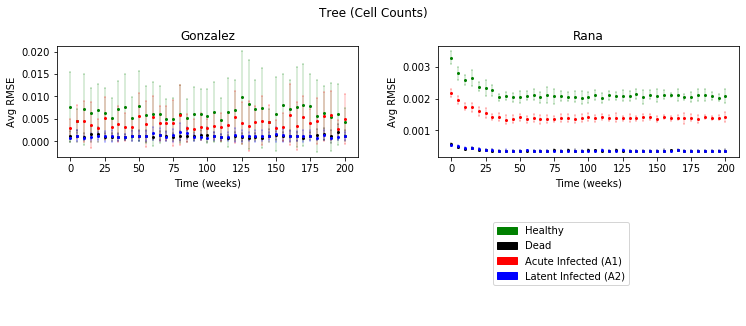

In [7]:
for time in ['2', '4', '8']:
# for time in ['2']:
    this_DATA_DIR = os.path.join(DATA_DIR, 'EarlyTreatment', time)
    this_SAVE_DIR = os.path.join(SAVE_DIR, 'EarlyTreatment', time)
    crawl_and_plot(this_DATA_DIR, this_SAVE_DIR);